In [5]:
import cv2

cap = cv2.VideoCapture('D:/yolo_v3/test2.mp4')


#Object Detection

object_detector = cv2.createBackgroundSubtractorMOG2()
#가우시안 분산값 K(3~5)의 합으로 배경 픽셀 구성


while True:
    ret, frame = cap.read()
    height, width, _ = frame.shape
    
    
    # Extract Region of interest
    roi = frame[340:600,500:700]
    
    #Object Detection
    mask = object_detector.apply(roi)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours :
        # Calculate area and remove small elements
        area = cv2.contourArea(cnt)
        if area > 100 : # 픽셀의 크기에 따라 요소들을 추가하거나 제거할 수 있다
            cv2.drawContours(roi, [cnt], -1, (0,255,0), 2)

    cv2.imshow("ROI",roi)
    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)
    #s로 루프끊기
    key=cv2.waitKey(30)
    if key == 27 : 
        break

cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>

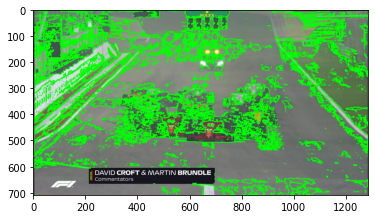

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('./image/1.png')
plt.imshow(image)

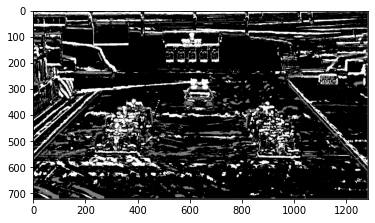

In [4]:
image = Image.open('./image/2.png')
plt.imshow(image)

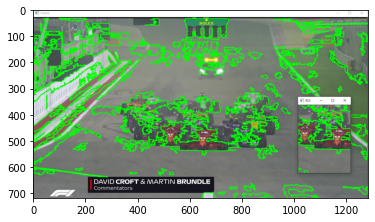

In [3]:
image = Image.open('./image/3.png')
plt.imshow(image)

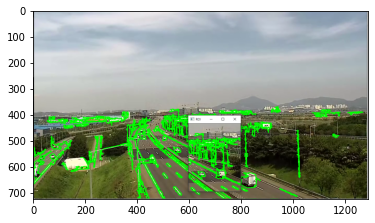

In [3]:
image = Image.open('./image/4.png')
plt.imshow(image)

In [4]:
##고속도로 영상으로 바꿔서 확인하고자 하는 부분만 ROI로 추출

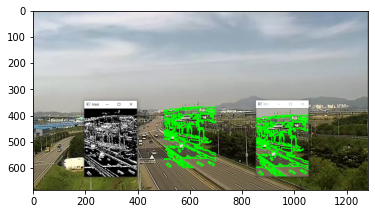

In [2]:
image = Image.open('./image/5.png')
plt.imshow(image)

In [2]:
import cv2
from tracker import *
cap = cv2.VideoCapture('D:/yolo_v3/test2.mp4')

#create tracker object
tracker = EuclideanDistTracker()
#객체의 경계박스를 하나의 배열로 만들어 객체 감지에 사용한다

#Object Detection

object_detector = cv2.createBackgroundSubtractorMOG2(history=50,varThreshold=80)
#가우시안 분산값 K(3~5)의 합으로 배경 픽셀 구성
#varThreshold는 Mahalanobis 거리 제곱의 임계치, 작은값을 사용하면 많은 화소를 검출해낸다.
#detectShadows:그림자검출여부   =True :검출 // =False : 검출 X
#history : background model 검출에 영향을 주는 최근 프레임의 길이

while True:
    ret, frame = cap.read()
    height, width, _ = frame.shape
    
    
    # Extract Region of interest
    roi = frame[340:600,500:700]
    
    #Object Detection
    mask = object_detector.apply(roi)
    _, mask = cv2.threshold(mask, 254,255,cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    detections = [] #배열을 담기위한 빈 배열 생성
    
    
    for cnt in contours :
        # Calculate area and remove small elements
        area = cv2.contourArea(cnt)
        if area > 100 : # 픽셀의 크기에 따라 요소들을 추가하거나 제거할 수 있다
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(roi, (x,y),(x+w, y+h), (0,255,0),3)
            detections.append([x,y,w,h]) ##빈 배열에 입력된 x,y,w,h 넣어주기
            
    # object tracking
    boxes_ids = tracker.update(detections)
    for box_id in boxes_ids :
        x,y,w,h,id = box_id
        cv2.putText(roi,str(id),(x,y -15),cv2.FONT_HERSHEY_PLAIN, 1,(255,0,0),2)
        cv2.rectangle(roi,(x,y), (x+w,y+h), (0,255,0),3)
    
    
    
    
    cv2.imshow("ROI",roi)
    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)
    #s로 루프끊기
    key=cv2.waitKey(30)
    if key == 27 : 
        break

cap.release()
cv2.destroyAllWindows

{2: (22, 215), 3: (100, 184)}
{5: (23, 213), 6: (149, 207)}
{5: (42, 225)}
{7: (38, 228), 8: (139, 140), 9: (110, 123)}
{7: (38, 229), 8: (139, 140), 9: (110, 123), 10: (71, 117), 11: (12, 95)}
{7: (54, 220), 8: (139, 140), 9: (110, 123), 10: (71, 117), 11: (12, 95)}
{7: (54, 220), 8: (158, 135), 9: (110, 123), 10: (71, 117), 11: (12, 95), 12: (99, 183)}
{7: (54, 220), 8: (158, 135), 9: (95, 120), 10: (71, 117), 11: (12, 95), 12: (99, 183)}
{7: (54, 220), 8: (158, 135), 9: (106, 120), 10: (71, 117), 11: (12, 95), 12: (99, 183)}
{7: (54, 220), 8: (158, 135), 9: (106, 120), 10: (52, 114), 11: (12, 95), 12: (99, 183)}
{7: (37, 229), 12: (99, 183), 8: (158, 135), 9: (106, 120), 10: (52, 114)}
{7: (54, 220), 12: (99, 183), 8: (158, 135), 9: (106, 120), 10: (52, 114)}
{7: (54, 220), 12: (95, 183), 8: (158, 135), 9: (106, 120), 10: (52, 114)}
{7: (54, 220), 12: (95, 183), 8: (158, 135), 9: (106, 120), 10: (53, 114)}
{7: (38, 229), 12: (95, 183), 10: (53, 114), 13: (192, 216)}
{7: (54, 220), 1

{46: (64, 204), 50: (143, 198)}
{46: (64, 204), 50: (142, 198)}
{46: (63, 203), 50: (142, 198)}
{46: (63, 203), 50: (139, 197)}
{46: (61, 201), 50: (139, 197)}
{46: (61, 201), 50: (138, 195)}
{46: (60, 200), 50: (138, 195)}
{46: (60, 200), 50: (133, 194)}
{46: (58, 200), 50: (133, 194)}
{46: (58, 200), 50: (135, 194)}
{46: (56, 198), 50: (135, 194)}
{46: (56, 198), 50: (132, 191)}
{46: (53, 196), 50: (132, 191)}
{46: (53, 196), 50: (127, 187)}
{46: (51, 195), 50: (127, 187)}
{46: (51, 195), 50: (126, 188)}
{46: (50, 194), 50: (126, 188)}
{46: (50, 194), 50: (121, 188)}
{46: (48, 193), 50: (121, 188)}
{46: (48, 193), 50: (123, 189)}
{46: (47, 193), 50: (123, 189)}
{46: (47, 193), 50: (120, 188)}
{46: (46, 192), 50: (120, 188)}
{46: (46, 192), 50: (121, 187)}
{46: (45, 191), 50: (121, 187)}
{46: (45, 191), 50: (123, 189)}
{46: (43, 190), 50: (123, 189)}
{46: (43, 190), 50: (122, 185)}
{46: (41, 189), 50: (122, 185)}
{46: (41, 189), 50: (120, 186)}
{46: (40, 188), 50: (120, 186)}
{46: (39

{105: (140, 242), 106: (182, 241), 102: (51, 224), 107: (138, 199), 108: (45, 111), 104: (135, 132), 109: (8, 94)}
{105: (140, 242), 106: (183, 241), 102: (51, 224), 107: (138, 199), 108: (45, 111), 104: (135, 132), 109: (8, 94)}
{105: (140, 242), 106: (183, 241), 102: (52, 223), 107: (138, 199), 108: (45, 111), 104: (135, 132), 109: (8, 94)}
{105: (140, 242), 106: (183, 241), 102: (49, 223), 107: (138, 199), 108: (45, 111), 104: (135, 132), 109: (8, 94)}
{105: (144, 243), 106: (183, 241), 102: (49, 223), 110: (40, 198), 111: (104, 182), 112: (161, 125), 113: (28, 250)}
{105: (144, 243), 106: (184, 241), 102: (49, 223), 110: (40, 198), 111: (104, 182), 112: (161, 125), 113: (28, 250)}
{105: (144, 243), 106: (184, 241), 102: (52, 221), 110: (40, 198), 111: (104, 182), 112: (161, 125), 113: (28, 250), 114: (119, 245)}
{105: (144, 243), 106: (184, 241), 102: (61, 214), 110: (40, 198), 111: (104, 182), 112: (161, 125), 113: (28, 250), 114: (119, 245), 115: (184, 191)}
{105: (144, 243), 106

{132: (71, 228), 102: (63, 198), 133: (134, 185), 129: (181, 64)}
{132: (71, 228), 102: (63, 198), 133: (129, 182), 129: (181, 64)}
{132: (71, 228), 133: (126, 179), 135: (174, 137)}
{133: (135, 184), 136: (75, 229)}
{136: (75, 229), 133: (135, 184)}
{137: (161, 193), 138: (70, 197)}
{138: (75, 197), 137: (161, 193), 139: (124, 241), 140: (7, 215)}
{138: (73, 218), 137: (161, 193), 139: (124, 241), 140: (7, 215)}
{138: (73, 218), 137: (155, 188), 139: (124, 241), 140: (7, 215)}
{139: (124, 241), 140: (8, 223), 138: (73, 218), 137: (155, 188), 141: (66, 38), 142: (165, 253)}
{139: (124, 241), 140: (8, 223), 138: (79, 197), 137: (155, 188), 141: (66, 38), 142: (165, 253)}
{139: (124, 241), 140: (8, 223), 138: (77, 218), 137: (155, 188), 141: (66, 38), 142: (165, 253)}
{139: (124, 241), 140: (8, 223), 138: (77, 218), 137: (148, 182), 141: (66, 38), 142: (165, 253)}
{139: (124, 241), 140: (8, 223), 138: (77, 218), 137: (148, 182), 141: (52, 40), 142: (165, 253), 143: (184, 139), 144: (45, 

{178: (155, 223), 179: (170, 183)}
{178: (155, 223), 179: (169, 181)}
{178: (157, 224), 179: (169, 181)}
{178: (158, 225)}
{178: (160, 227), 180: (166, 179)}
{178: (161, 229)}
{178: (164, 231), 181: (163, 179)}
{178: (164, 231), 181: (162, 177)}
{178: (166, 231), 181: (162, 177)}
{178: (166, 231), 181: (161, 176)}
{178: (169, 233), 181: (161, 176)}
{178: (169, 233), 181: (160, 176)}
{178: (170, 236), 181: (160, 176)}
{178: (172, 238)}
{178: (175, 239)}
{178: (176, 241), 182: (157, 173)}
{178: (176, 241), 182: (156, 172)}
{178: (178, 243), 182: (156, 172)}
{178: (181, 244)}
{178: (184, 246)}
{178: (184, 247), 183: (154, 169)}
{178: (184, 247), 183: (153, 169)}
{178: (186, 248), 183: (153, 169)}
{178: (187, 249)}
{178: (189, 250), 184: (150, 168)}
{178: (192, 253)}


<function destroyAllWindows>

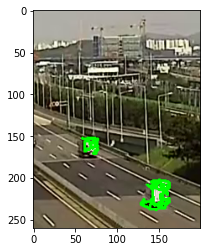

In [3]:
image = Image.open('./image/7.png')
plt.imshow(image)

In [4]:
#완전 정확하지는 않지만 차량만을 인식하는것을 확인할 수 있다

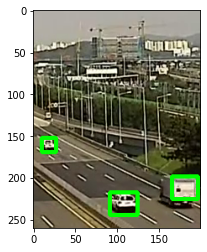

In [2]:
image = Image.open('./image/9.png')
plt.imshow(image)

In [3]:
#drawContours를 지우고, x,y,w,h 좌표를 얻어서 rectangle을 그려주면 다음과같은 결과를 얻을 수있다

In [ ]:
## 개체 추적 적용하기 ##
import math


class EuclideanDistTracker:
    def __init__(self):
        # Store the center positions of the objects
        self.center_points = {}
        # Keep the count of the IDs
        # each time a new object id detected, the count will increase by one
        self.id_count = 0


    def update(self, objects_rect):
        # Objects boxes and ids
        objects_bbs_ids = []

        # Get center point of new object
        for rect in objects_rect:
            x, y, w, h = rect
            cx = (x + x + w) // 2
            cy = (y + y + h) // 2

            # Find out if that object was detected already
            same_object_detected = False
            for id, pt in self.center_points.items():
                dist = math.hypot(cx - pt[0], cy - pt[1])

                if dist < 25:
                    self.center_points[id] = (cx, cy)
                    print(self.center_points)
                    objects_bbs_ids.append([x, y, w, h, id])
                    same_object_detected = True
                    break

            # New object is detected we assign the ID to that object
            if same_object_detected is False:
                self.center_points[self.id_count] = (cx, cy)
                objects_bbs_ids.append([x, y, w, h, self.id_count])
                self.id_count += 1

        # Clean the dictionary by center points to remove IDS not used anymore
        new_center_points = {}
        for obj_bb_id in objects_bbs_ids:
            _, _, _, _, object_id = obj_bb_id
            center = self.center_points[object_id]
            new_center_points[object_id] = center

        # Update dictionary with IDs not used removed
        self.center_points = new_center_points.copy()
        return objects_bbs_ids





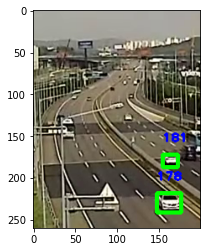

In [3]:
image = Image.open('./image/10.png')
plt.imshow(image)

In [4]:
#차량에 고유번호를 붙여 추적할수 있다
#하지만 detection이 풀렸다가 다시 잡히는 경우에는 새로운 고유번호를 부여하기때문에
#꾸준히 detection을 할 수 있는것이 중요하다